In [81]:
import pandas as pd, numpy as np, time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV

# Librerías para plots
from sklearn import tree
#import graphviz
from scipy.stats import norm
from scipy.stats import t
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [82]:
df = pd.read_csv('/Users/lucas_botella/Downloads/raw_deaths_covid_data_for_clustering.csv')
del df['Unnamed: 0']
df

,Code,Date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,international_travel_controls,restrictions_internal_movements,...,beds_per_1000,total_vaccinations_per_100,%youth_unemployment_total,deaths_prev_18,deaths_prev_25,deaths_prev_32,accumulated,%df_population_gr_65,UN Population Division (Median Age) (2017),deaths
0,AUS,2020-03-09,0.844429,1.513714,-1.051571,6.238714,-1.572286,9.373571,3.000000,0.000000,...,-738.056640,NaN,11.84,193.202250,NaN,NaN,193.202250,15.921202,37.900002,153.811500
1,AUS,2020-03-16,0.979571,2.061143,-1.204286,8.938714,-0.102000,11.000000,3.000000,0.000000,...,-539.977440,NaN,11.84,141.619125,-39.390750,NaN,334.821375,15.921202,37.900002,145.995875
2,AUS,2020-03-23,1.285714,7.040857,-0.816143,8.061143,-0.816286,10.183857,3.000000,0.000000,...,-586.796160,NaN,11.84,153.811500,4.376750,-39.390750,488.632875,15.921202,37.900002,144.432750
3,AUS,2020-03-30,-0.122286,10.122429,0.102000,2.061143,-1.755143,5.979571,3.000000,0.000000,...,-556.784160,NaN,11.84,145.995875,-9.378750,4.376750,634.628750,15.921202,37.900002,227.591000
4,AUS,2020-04-06,-4.489857,23.734571,2.449000,-11.000000,-12.081571,5.081571,3.428571,1.142857,...,-451.167168,NaN,11.84,118.491450,81.595125,-9.378750,753.120200,15.921202,37.900002,311.104175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077,USA,2021-01-18,-25.224571,-9.775571,14.102286,-41.081571,-15.591714,-44.102000,3.000000,2.000000,...,-87515.831234,NaN,8.30,30494.320988,2598.736875,289.573538,614937.364105,16.209606,38.299999,27279.312225
2078,USA,2021-01-25,-23.653143,-10.571429,12.591857,-40.000000,-20.244857,-34.122429,3.000000,2.000000,...,-95357.779628,NaN,8.30,33226.707188,-3215.008763,2598.736875,648164.071293,16.209606,38.299999,25178.047837
2079,USA,2021-02-01,-24.387714,-11.836714,10.897857,-39.938714,-22.000000,-27.754857,3.000000,2.000000,...,-60993.943093,0.307500,8.30,21253.244980,-8048.659350,-3215.008763,669417.316273,16.209606,38.299999,17082.425810
2080,USA,2021-02-08,-25.040857,-13.693857,10.816143,-40.816429,-17.673571,-29.857143,3.000000,2.000000,...,-56295.495051,0.913333,8.30,19616.155070,-4170.819170,-8048.659350,689033.471343,16.209606,38.299999,14190.040810


In [65]:
df['total_vaccinations_per_100'].fillna(0)

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
2077    0.000000
2078    0.000000
2079    0.307500
2080    0.913333
2081    1.634000
Name: total_vaccinations_per_100, Length: 2082, dtype: float64

In [66]:
df=df.fillna(df.median())

In [67]:
df.columns

Index(['Code', 'Date', 'retail_and_recreation', 'grocery_and_pharmacy',
       'residential', 'transit_stations', 'parks', 'workplaces',
       'contact_tracing', 'testing_policy', 'international_travel_controls',
       'restrictions_internal_movements', 'close_public_transport',
       'public_information_campaigns', 'facial_coverings',
       'stay_home_requirements', 'restriction_gatherings',
       'cancel_public_events', 'workplace_closures', 'school_closures',
       'debt_relief', 'income_support', 'Holiday', 'temp', 'prcp',
       'doctors_per_1000', 'nurses_per_1000', 'beds_per_1000',
       'number_of_arrivals', 'urban_population', 'total_vaccinations_per_100',
       '%youth_unemployment_total', 'life_expectancy', 'deaths_prev_18',
       'accumulated', 'tendency', 'deaths'],
      dtype='object')

In [68]:
df_km=df[['retail_and_recreation', 'grocery_and_pharmacy',
       'residential', 'transit_stations', 'parks', 'workplaces',
       'contact_tracing', 'testing_policy', 'international_travel_controls',
       'restrictions_internal_movements', 'close_public_transport',
       'public_information_campaigns', 'facial_coverings',
       'stay_home_requirements', 'restriction_gatherings',
       'cancel_public_events', 'workplace_closures', 'school_closures',
       'debt_relief', 'income_support', 'Holiday', 'temp', 'prcp',
       'doctors_per_1000', 'nurses_per_1000', 'beds_per_1000',
       'number_of_arrivals', 'urban_population', 'total_vaccinations_per_100',
       '%youth_unemployment_total', 'life_expectancy', 'deaths_prev_18',
       'accumulated', 'tendency']]

In [69]:
df_km

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,contact_tracing,testing_policy,international_travel_controls,restrictions_internal_movements,...,nurses_per_1000,beds_per_1000,number_of_arrivals,urban_population,total_vaccinations_per_100,%youth_unemployment_total,life_expectancy,deaths_prev_18,accumulated,tendency
0,0.844429,1.513714,-1.051571,6.238714,-1.572286,9.373571,2.0,1.0,3.000000,0.000000,...,11.92,3.84,8263000.0,85.904,0.000000,11.84,82.748780,193.202250,193.202250,1.243508
1,0.979571,2.061143,-1.204286,8.938714,-0.102000,11.000000,2.0,1.0,3.000000,0.000000,...,11.92,3.84,8263000.0,85.904,0.000000,11.84,82.748780,141.619125,334.821375,-39.390750
2,1.285714,7.040857,-0.816143,8.061143,-0.816286,10.183857,2.0,1.0,3.000000,0.000000,...,11.92,3.84,8263000.0,85.904,0.000000,11.84,82.748780,153.811500,488.632875,4.376750
3,-0.122286,10.122429,0.102000,2.061143,-1.755143,5.979571,2.0,1.0,3.000000,0.000000,...,11.92,3.84,8263000.0,85.904,0.000000,11.84,82.748780,145.995875,634.628750,-9.378750
4,-4.489857,23.734571,2.449000,-11.000000,-12.081571,5.081571,2.0,1.0,3.428571,1.142857,...,11.92,3.84,8263000.0,85.904,0.000000,11.84,82.748780,118.491450,753.120200,81.595125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077,-25.224571,-9.775571,14.102286,-41.081571,-15.591714,-44.102000,1.0,3.0,3.000000,2.000000,...,11.89,2.87,75608000.0,82.058,0.000000,8.30,78.539024,30494.320988,614937.364105,2598.736875
2078,-23.653143,-10.571429,12.591857,-40.000000,-20.244857,-34.122429,1.0,3.0,3.000000,2.000000,...,11.89,2.87,75608000.0,82.058,0.000000,8.30,78.539024,33226.707188,648164.071293,-3215.008763
2079,-24.387714,-11.836714,10.897857,-39.938714,-22.000000,-27.754857,1.0,3.0,3.000000,2.000000,...,11.89,2.87,75608000.0,82.058,0.307500,8.30,78.539024,21253.244980,669417.316273,-8048.659350
2080,-25.040857,-13.693857,10.816143,-40.816429,-17.673571,-29.857143,1.0,3.0,3.000000,2.000000,...,11.89,2.87,75608000.0,82.058,0.913333,8.30,78.539024,19616.155070,689033.471343,-4170.819170


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.8054776158036845
For n_clusters = 3 The average silhouette_score is : 0.7649469703173843
For n_clusters = 4 The average silhouette_score is : 0.6958682616328545
For n_clusters = 5 The average silhouette_score is : 0.6547955153718064
For n_clusters = 6 The average silhouette_score is : 0.6980179122763065
For n_clusters = 7 The average silhouette_score is : 0.7334248944919924
For n_clusters = 8 The average silhouette_score is : 0.7449350078841023
For n_clusters = 9 The average silhouette_score is : 0.7432003984486344
For n_clusters = 10 The average silhouette_score is : 0.7398015932117058
For n_clusters = 11 The average silhouette_score is : 0.7583674559848776
For n_clusters = 12 The average silhouette_score is : 0.7473075607843512
For n_clusters = 13 The average silhouette_score is : 0.7580450998889459


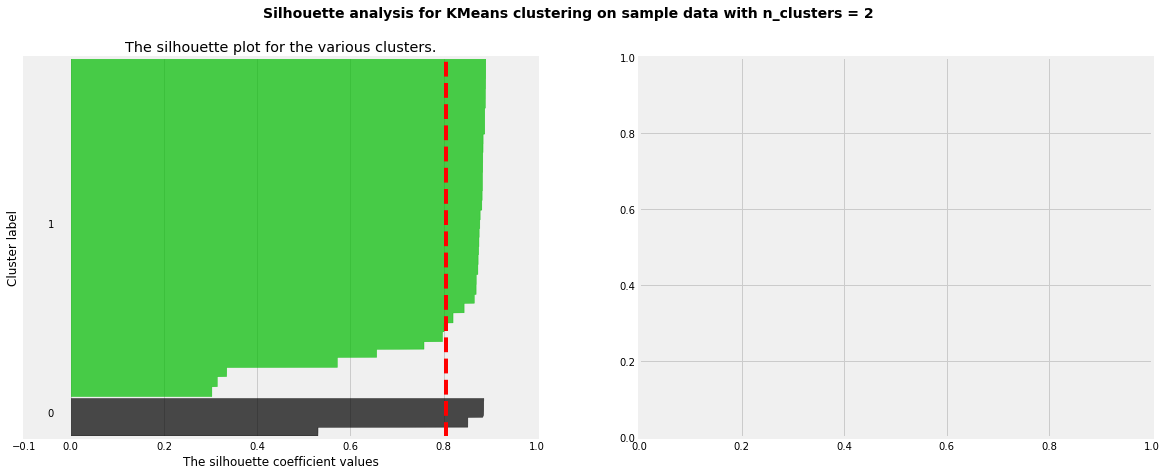

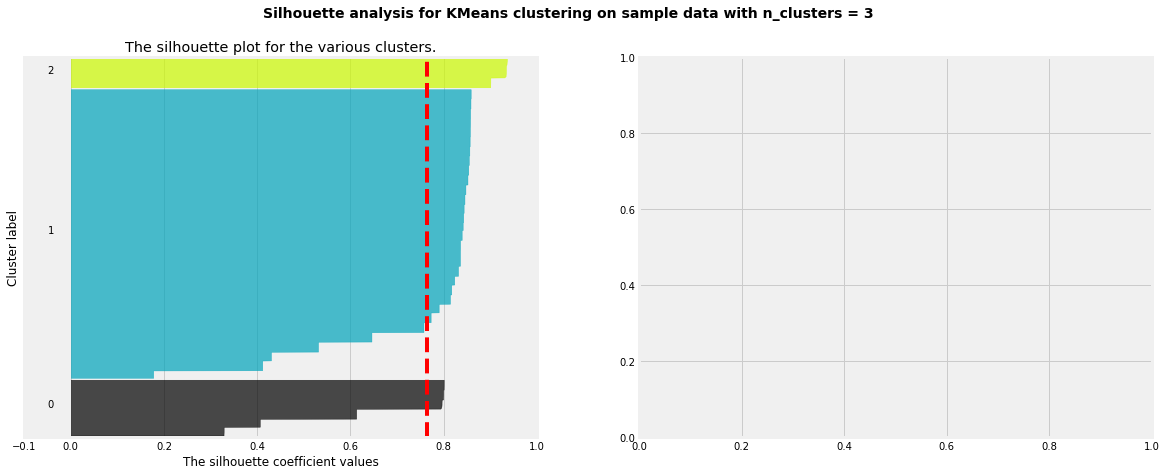

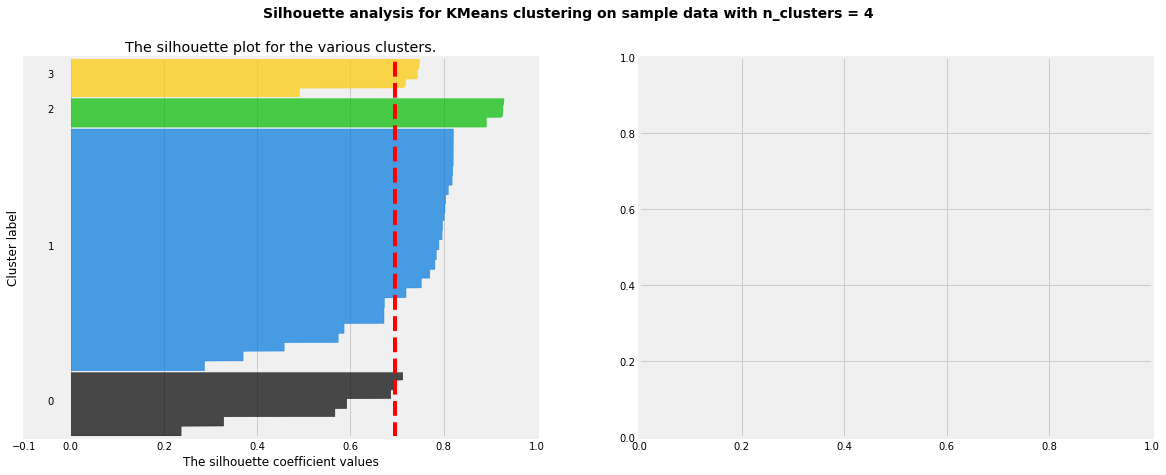

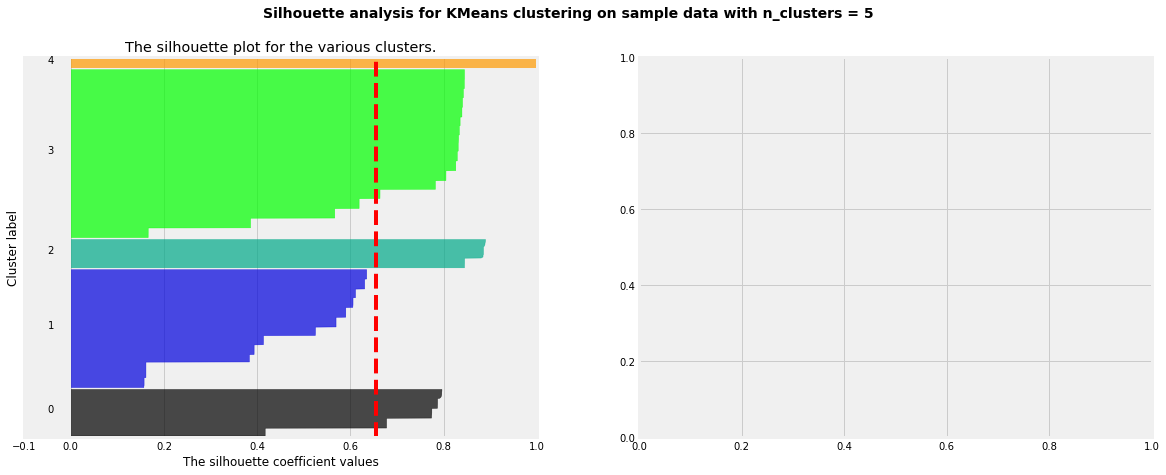

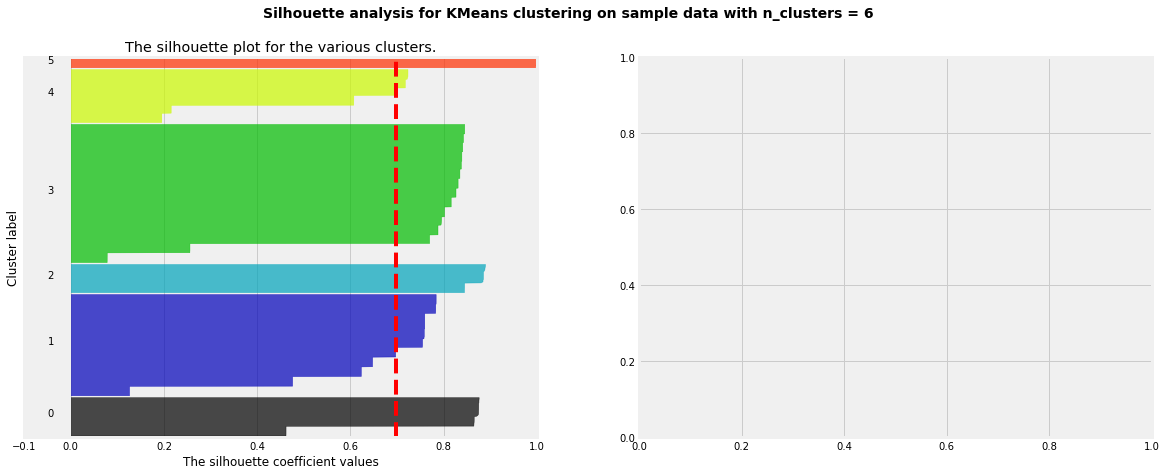

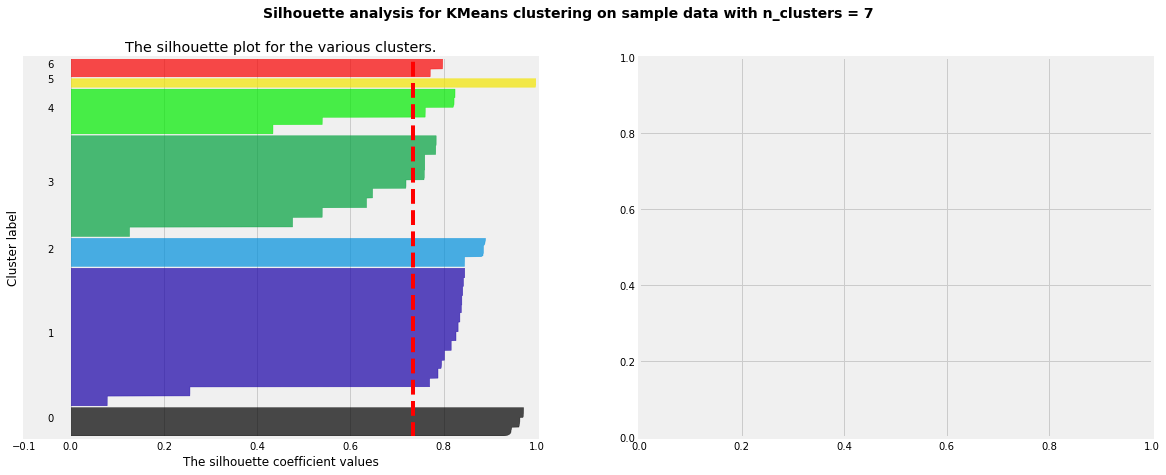

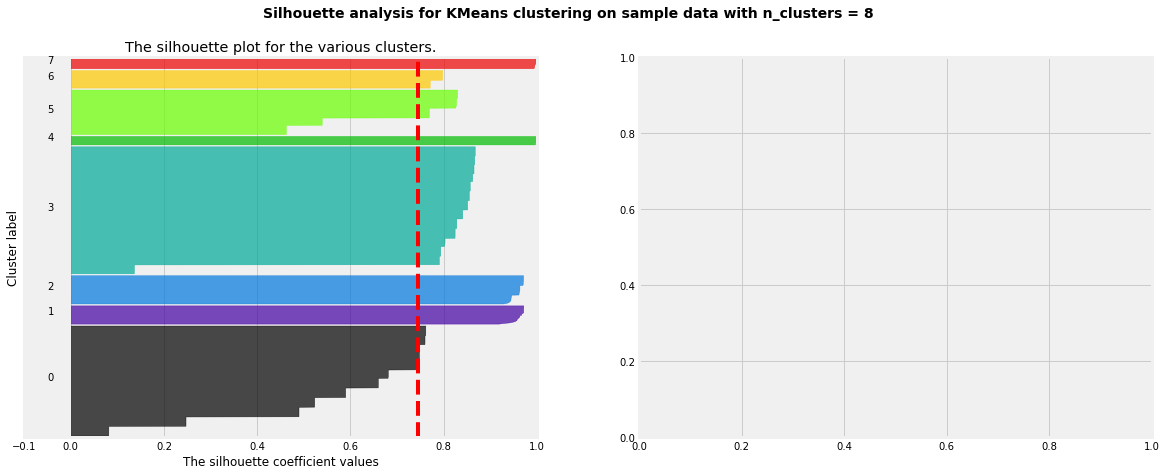

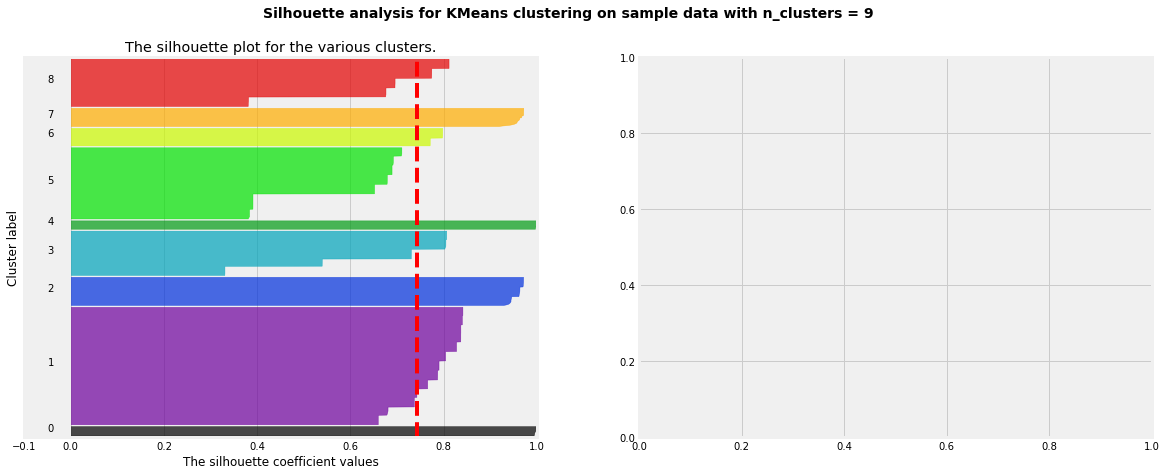

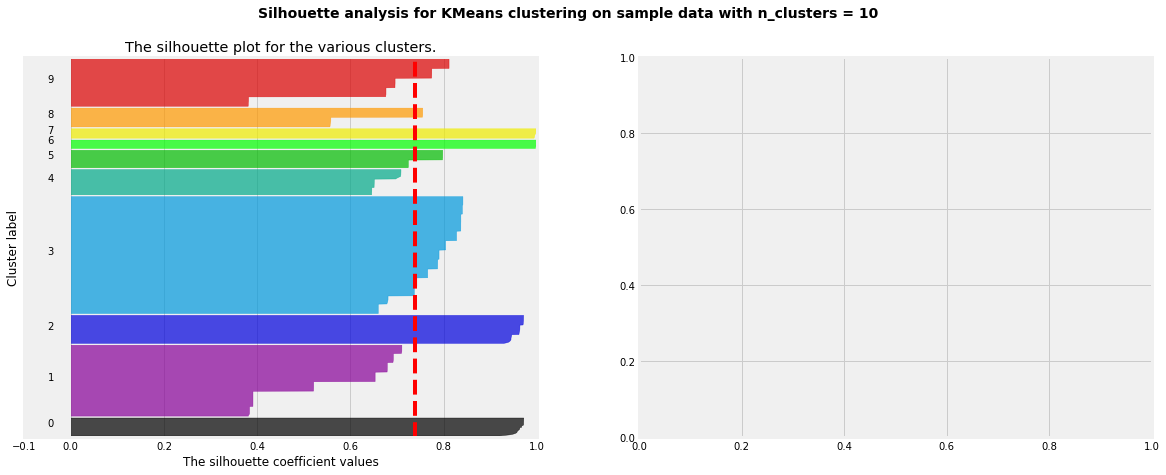

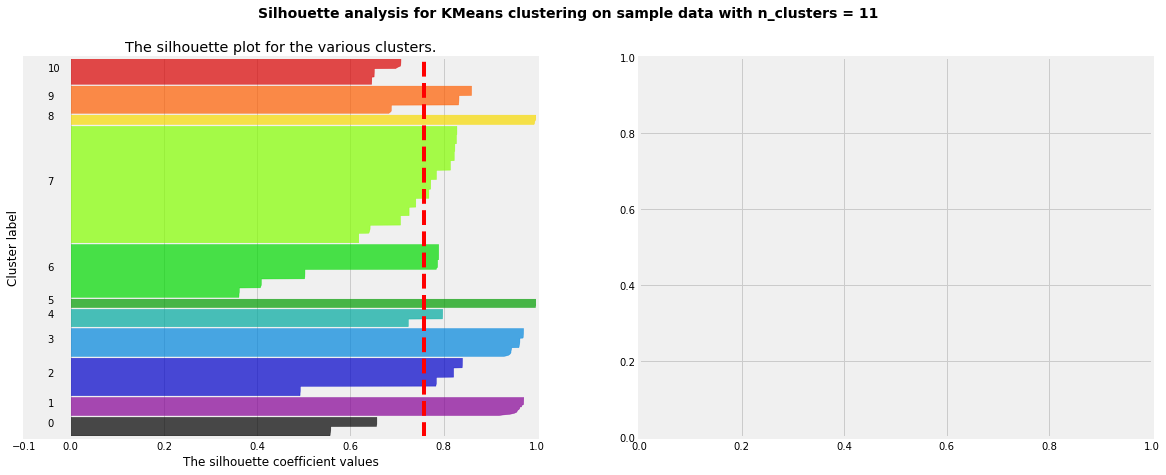

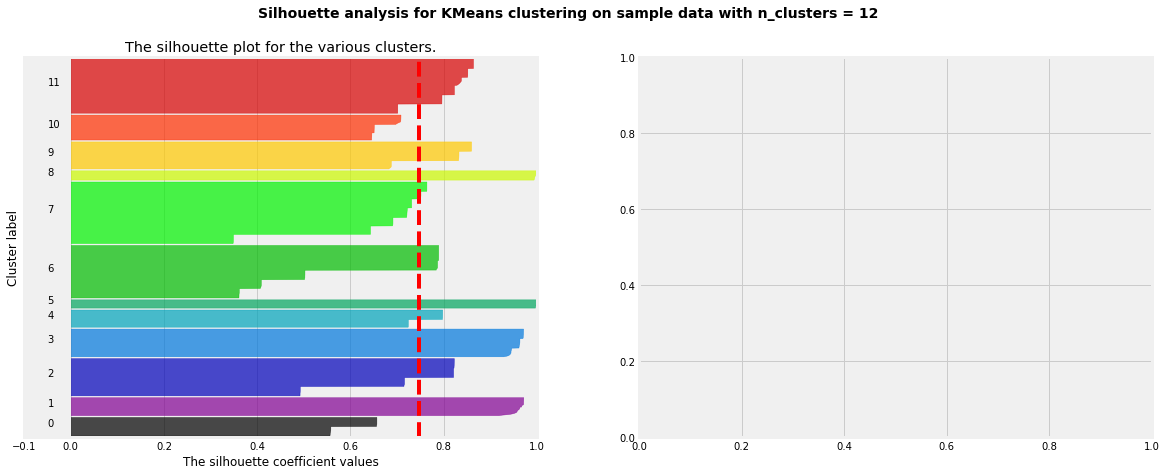

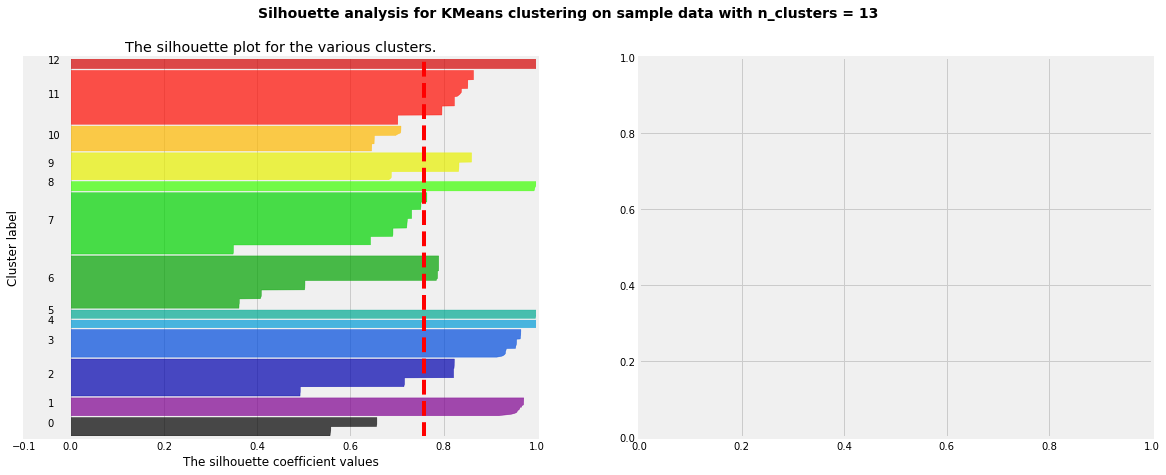

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = df_km

range_n_clusters = [2, 3, 4,5,6,7,8,9,10,11,12,13]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [71]:
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_km)
    sse.append(kmeans.inertia_)

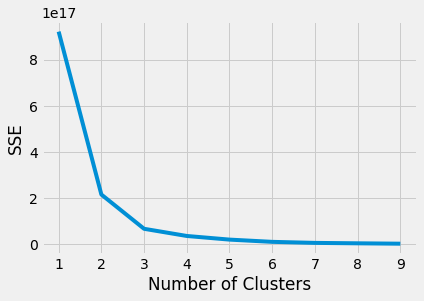

In [72]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [73]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(df_km)
centroids = kmeans.cluster_centers_

In [74]:
df['cluster']=kmeans.labels_.astype(float)

In [75]:
df

,Code,Date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,contact_tracing,testing_policy,...,number_of_arrivals,urban_population,total_vaccinations_per_100,%youth_unemployment_total,life_expectancy,deaths_prev_18,accumulated,tendency,deaths,cluster
0,AUS,2020-03-09,0.844429,1.513714,-1.051571,6.238714,-1.572286,9.373571,2.0,1.0,...,8263000.0,85.904,0.000000,11.84,82.748780,193.202250,193.202250,1.243508,153.811500,0.0
1,AUS,2020-03-16,0.979571,2.061143,-1.204286,8.938714,-0.102000,11.000000,2.0,1.0,...,8263000.0,85.904,0.000000,11.84,82.748780,141.619125,334.821375,-39.390750,145.995875,0.0
2,AUS,2020-03-23,1.285714,7.040857,-0.816143,8.061143,-0.816286,10.183857,2.0,1.0,...,8263000.0,85.904,0.000000,11.84,82.748780,153.811500,488.632875,4.376750,144.432750,0.0
3,AUS,2020-03-30,-0.122286,10.122429,0.102000,2.061143,-1.755143,5.979571,2.0,1.0,...,8263000.0,85.904,0.000000,11.84,82.748780,145.995875,634.628750,-9.378750,227.591000,0.0
4,AUS,2020-04-06,-4.489857,23.734571,2.449000,-11.000000,-12.081571,5.081571,2.0,1.0,...,8263000.0,85.904,0.000000,11.84,82.748780,118.491450,753.120200,81.595125,311.104175,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077,USA,2021-01-18,-25.224571,-9.775571,14.102286,-41.081571,-15.591714,-44.102000,1.0,3.0,...,75608000.0,82.058,0.000000,8.30,78.539024,30494.320988,614937.364105,2598.736875,27279.312225,1.0
2078,USA,2021-01-25,-23.653143,-10.571429,12.591857,-40.000000,-20.244857,-34.122429,1.0,3.0,...,75608000.0,82.058,0.000000,8.30,78.539024,33226.707188,648164.071293,-3215.008763,25178.047837,1.0
2079,USA,2021-02-01,-24.387714,-11.836714,10.897857,-39.938714,-22.000000,-27.754857,1.0,3.0,...,75608000.0,82.058,0.307500,8.30,78.539024,21253.244980,669417.316273,-8048.659350,17082.425810,1.0
2080,USA,2021-02-08,-25.040857,-13.693857,10.816143,-40.816429,-17.673571,-29.857143,1.0,3.0,...,75608000.0,82.058,0.913333,8.30,78.539024,19616.155070,689033.471343,-4170.819170,14190.040810,1.0


In [76]:
clusters=[i for i in range(0,2)]
aux=[]
for cluster in clusters:
    aux.extend(df[df['cluster']==cluster].Code.unique().tolist())

In [77]:
any(aux.count(x) > 1 for x in aux)

False

In [78]:
df[df['cluster']==1].Code.unique()

array(['ESP', 'FRA', 'ITA', 'USA'], dtype=object)

In [167]:
df.to_csv('/Users/lucas_botella/Downloads/cluster_covid_data.csv')